# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [30]:
### Baixando dataset do kaggle
import kagglehub
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

In [31]:
### Criando dataframe a partir do dataset
import pandas as pd
print(f'{path}\\Hotel Reservations.csv')
file_path = f'{path}\\Hotel Reservations.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\e101152\.cache\kagglehub\datasets\ahsan81\hotel-reservations-classification-dataset\versions\1\Hotel Reservations.csv


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
### Resposta 1: Somando as colunas de noites e adicionando ao dataframe
def obter_noites_totais(week_nights, weekend_nights):
    return week_nights + weekend_nights

df['stay_duration'] = df.apply(lambda linha: obter_noites_totais(linha['no_of_week_nights'], linha['no_of_weekend_nights']), axis=1)

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [16]:
### Resposta 2: Normalização min-max:
def normalizar(value):
    return (value - value.min()) / (value.max() - value.min())

print(df[['avg_price_per_room']].transform(normalizar))


       avg_price_per_room
0                0.120370
1                0.197556
2                0.111111
3                0.185185
4                0.175000
...                   ...
36270            0.310741
36271            0.168426
36272            0.182204
36273            0.175000
36274            0.299389

[36275 rows x 1 columns]


## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [35]:
### Resposta três: Extraindo números da coluna room_type_reserved
df['room_type_reserved'] = df['room_type_reserved'].replace(r'[^\d.]', '', regex=True)

print(df['room_type_reserved'])

0        1
1        1
2        1
3        1
4        1
        ..
36270    4
36271    1
36272    1
36273    1
36274    1
Name: room_type_reserved, Length: 36275, dtype: object


## Exercício 4: Gráfico Mapa de Calor
Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

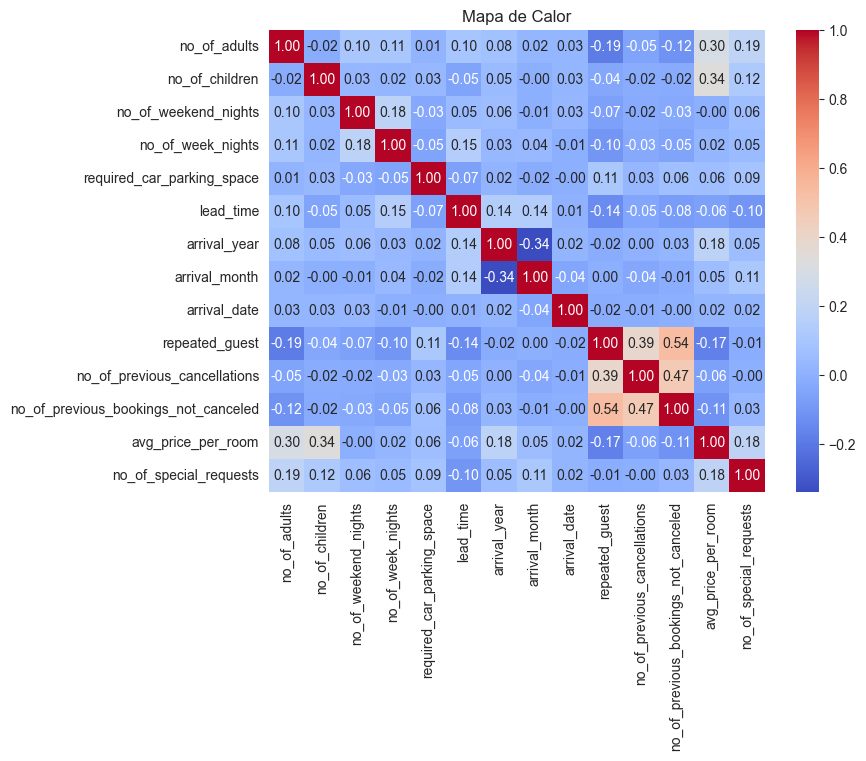

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df.select_dtypes(include=[np.number])

matriz_correlacao = df_numerico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor")
plt.show()

## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.
Dúvida - Extrair os numéricos, mas o resultado deve ser os números extraídos ou os caractéres não numéricos? Isso não ficou totalmente claro, vou assumir que devo manter apenas os números.

In [34]:
import re

df['Booking_ID'] = df['Booking_ID'].apply(lambda x: re.sub(r'\D', '', x))

print(df['Booking_ID'])

0        00001
1        00002
2        00003
3        00004
4        00005
         ...  
36270    36271
36271    36272
36272    36273
36273    36274
36274    36275
Name: Booking_ID, Length: 36275, dtype: object


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

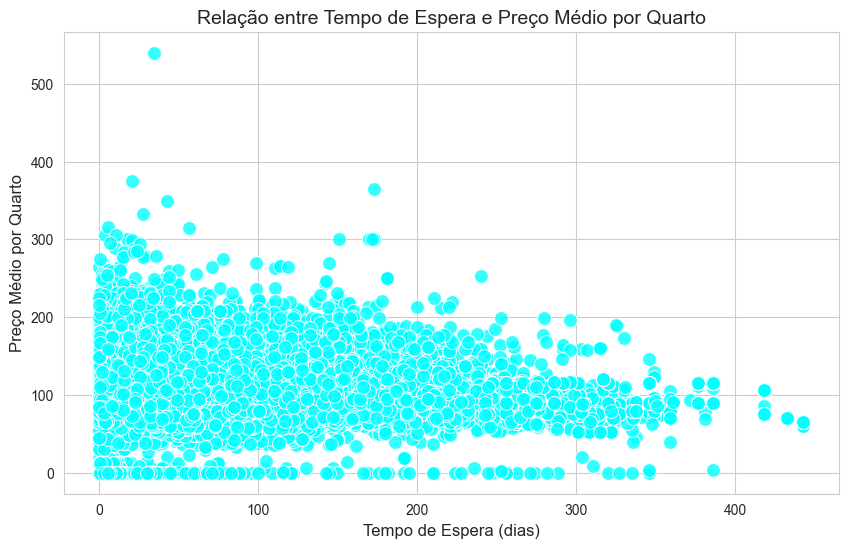

In [38]:
## Resposta 6: Demonstração da relação de tempo de espera por preço médio por quarto sem normalização
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', color='cyan', s=100, alpha=0.8)
plt.title('Relação entre Tempo de Espera e Preço Médio por Quarto', fontsize=14)
plt.xlabel('Tempo de Espera (dias)', fontsize=12)
plt.ylabel('Preço Médio por Quarto', fontsize=12)
plt.grid(True)
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [39]:
## Resposta 7: Preço médio por tipo de quarto sem normalização
average_price_per_room = df.groupby('room_type_reserved')['avg_price_per_room'].mean()
print(average_price_per_room)

room_type_reserved
1     95.918532
2     87.848555
3     73.678571
4    125.287317
5    123.733623
6    182.212836
7    155.198291
Name: avg_price_per_room, dtype: float64


## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

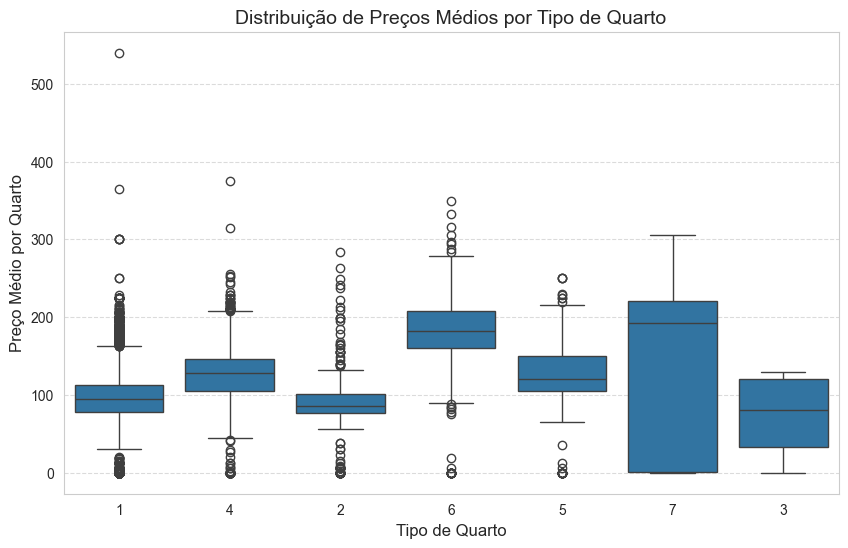

In [42]:
## Resposta 8: Boxplot do preço médio por tipo de quarto sem normalização
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type_reserved', y='avg_price_per_room')
plt.title('Distribuição de Preços Médios por Tipo de Quarto', fontsize=14)
plt.xlabel('Tipo de Quarto', fontsize=12)
plt.ylabel('Preço Médio por Quarto', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()